<a href="https://colab.research.google.com/github/VANISAIDEEPIKA/WEEK-3-Carbon-Emissions-Prediction-/blob/main/notebooks_colab/3_model_building_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3: Model Building & Prediction 🌿

In this notebook:
✅ Loaded cleaned dataset  
✅ Split data into train and test  
✅ Trained Random Forest model  
✅ Evaluated performance using RMSE, MAE, R²  
✅ Saved the trained model for Week 4 deployment  


### Import Essential Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import time

# Set global plot style
sns.set(style='whitegrid')

# Ensures reproducibility
random_state_num = 42


### Load Cleaned Dataset

In [4]:
# Replace with your cleaned dataset path if needed
data = pd.read_csv('data_cleaned.csv')
print("Dataset loaded successfully.")
data.head()


Dataset loaded successfully.


,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4099472.572
1,AGO,1992,397.0,4.982460,193.632183,550.548264,4418.735,0.401597,141.244823,15.660630,12.399823,5.779394e+09,470.0,235.3,3.226990,11002910.0,6.750459,4385759.926
2,AGO,1993,267.8,5.715529,266.318379,551.688878,5801.194,0.510141,246.261769,16.025739,12.399823,5.285600e+09,310.0,231.1,3.297243,11371750.0,6.700777,4689709.700
3,AGO,1994,298.4,4.195018,260.830190,541.553067,3890.687,0.331321,159.575256,16.065941,12.399824,4.059577e+09,190.0,226.3,3.212170,11742960.0,6.503667,5004849.552
4,AGO,1995,402.2,9.374417,237.623934,528.386164,11012.001,0.909699,409.106543,16.134424,12.399825,5.039535e+09,320.0,221.5,3.037335,12105105.0,6.223936,5326246.200


### Prepare Features and Target Variable

In [5]:
# ✅ Replace with your actual target column
target_column = 'co2_per_cap'  # predicting CO2 emissions per capita

X = data.drop(columns=[target_column])
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state_num)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 1360
Testing samples: 340


### Model Initialization and Training

In [6]:
# Correct target column
target_column = 'co2_per_cap'  # or your actual numeric target

# Prepare X and y
X = data.drop(columns=[target_column]).select_dtypes(include=['number'])
y = data[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state_num
)

print(f"✅ Training samples: {X_train.shape[0]}")
print(f"✅ Testing samples: {X_test.shape[0]}")

# Train model
start_time = time.time()

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=random_state_num,
    n_jobs=-1
)

rf.fit(X_train, y_train)

end_time = time.time()
print(f"✅ Model training completed in {end_time - start_time:.2f} seconds 🚀")


✅ Training samples: 1360
✅ Testing samples: 340
✅ Model training completed in 1.66 seconds 🚀


### Prediction and Model Evaluation

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = rf.predict(X_test)

rmse = mean_squared_error(y_test, y_pred) ** 0.5  # compute RMSE manually
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ MAE: {mae:.4f}")
print(f"✅ R² Score: {r2:.4f}")


✅ RMSE: 0.5876
✅ MAE: 0.2198
✅ R² Score: 0.9837


### Actual vs Predicted Visualization

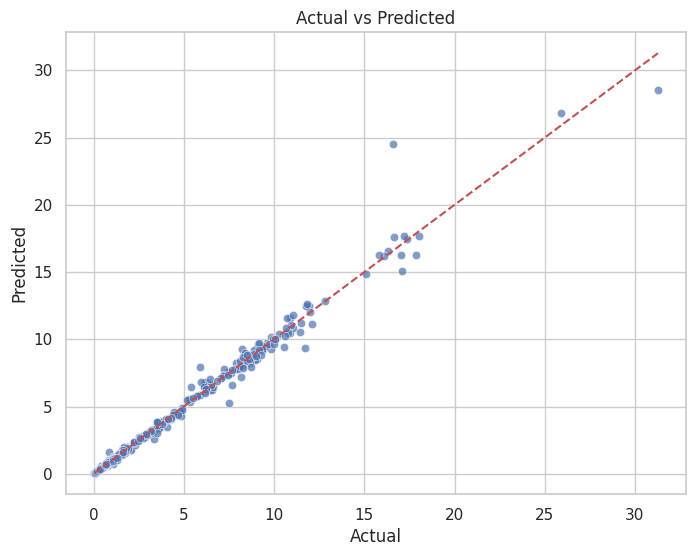

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


### Feature Importance

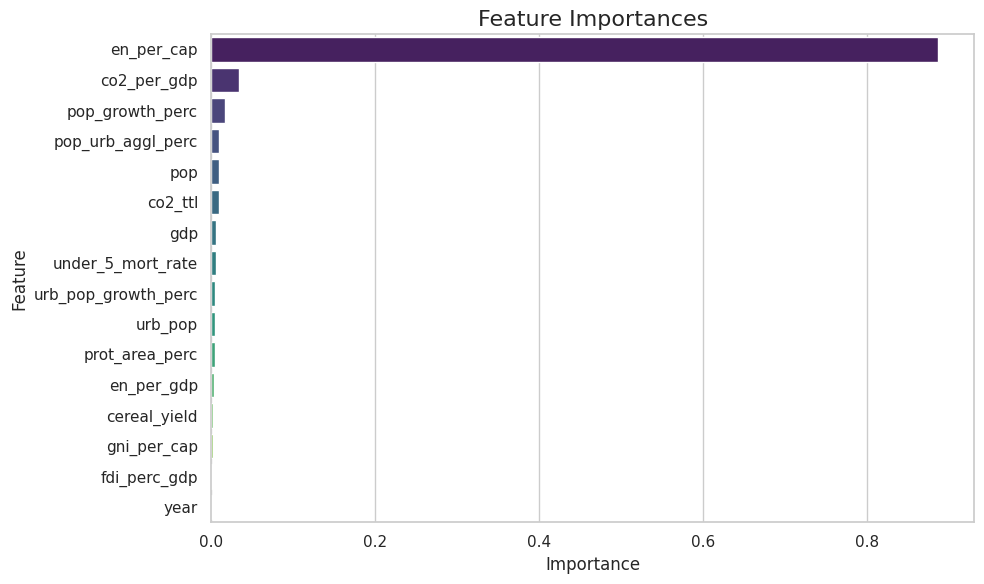

In [12]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Get sorted feature names and importances
sorted_features = np.array(X.columns)[indices]
sorted_importances = importances[indices]

# Create a DataFrame to use hue without legend
importance_df = pd.DataFrame({
    "Feature": sorted_features,
    "Importance": sorted_importances,
    "Hue": sorted_features  # dummy hue for palette use
})

plt.figure(figsize=(10, 6))
plt.title("Feature Importances", fontsize=16)

# ✅ No warning, future-safe
sns.barplot(
    data=importance_df,
    x="Importance",
    y="Feature",
    hue="Hue",  # dummy hue to assign palette safely
    palette="viridis",
    legend=False
)

plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


### Cross-validation (5-Fold) for Robust Evaluation

In [10]:
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", cv_scores)
print("Mean CV R² score:", np.mean(cv_scores))


Cross-validation R² scores: [0.78277137 0.70844284 0.6383411  0.89419698 0.91469144]
Mean CV R² score: 0.7876887454503775
